# Dragon Real Estate - Price Predictor

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit



In [73]:
# DataSet
housing = pd.read_csv('data.csv')
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [74]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [75]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286505,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705288,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


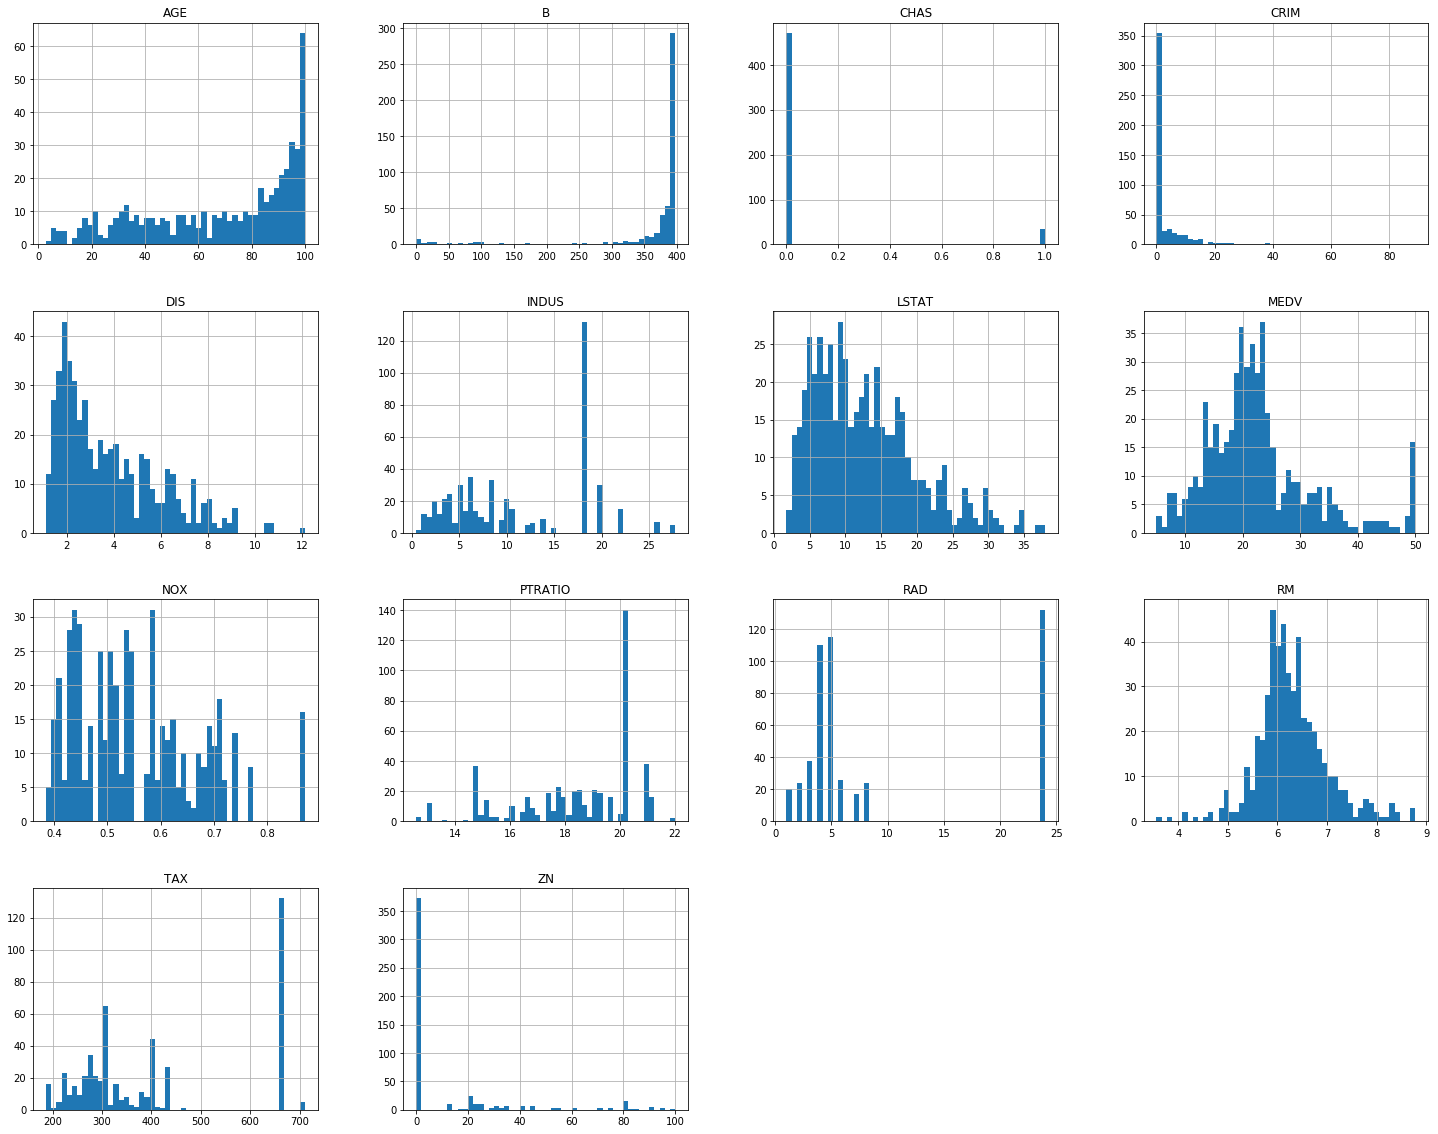

In [76]:
housing.hist(bins= 50, figsize= (25, 20))
plt.show()

In [77]:
# len(housing) * 0.8

In [78]:
# shuffle = np.random.permutation(len(housing))
# shuffle

In [79]:
# test_set_size =  int(len(housing) * 0.2)
# test_indices = shuffle[:test_set_size]
# train_indices = shuffle[test_set_size:]
# len(train_indices)

In [80]:
housing[housing['RM'].isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
11,0.11747,12.5,7.87,0,0.524,NaN,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
25,0.84054,0.0,8.14,0,0.538,NaN,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
43,0.15936,0.0,6.91,0,0.448,NaN,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
62,0.11027,25.0,5.13,0,0.453,NaN,67.8,7.2255,8,284,19.7,396.90,6.73,22.2
93,0.02875,28.0,15.04,0,0.464,NaN,28.9,3.6659,4,270,18.2,396.33,6.21,25.0


## Test-Train Split

In [81]:
def test_train_split(data, test_ratio):
    np.random.seed(42) # by this method the shuffled data will remain same whenever it is run again. 42 can be replaced by any other number
    shuffled = np.random.permutation(len(data))
#     print(shuffled)
    test_set_size = int(len(data) * test_ratio )
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [82]:
# test_value, train_value = test_train_split(housing, 0.2)
# len(train_value), len(test_value)

In [83]:
# test_value.head()

In [84]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [85]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
# train_set['CHAS'].value_counts()
len(train_set)

404

 Suppose the above lenght of the train_set is 404 on which our model will trained. suppose for Feature 'CHAS' contains 0's on 471 places and 1's on 35 places, if all the 0's goes into the training set then our model didnt trained on the value 1 so it will never make the right prediction so we have to shuffle and split in such a way that their is a mixture of 0's and 1's and for that we will use 
## StratifiedShufflesplit

In [86]:
stratifiedsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratifiedsplit.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [87]:
95/7

13.571428571428571

In [88]:
strat_train_set['CHAS'].value_counts()


0    376
1     28
Name: CHAS, dtype: int64

In [89]:
len(strat_train_set), len(strat_test_set)

(404, 102)

In [90]:
376/28

13.428571428571429

### The above ratio's show that StratifiedShuffleSplit splits data into train and test set with equal ratio's of values

##### we have to make a copy of strat_train_set so we can use it to train our model. we will not use the total dataframe just use the train_set

In [91]:
housing = strat_train_set.copy()

# Finding the Correlations in accordance of 'MEDV' because this is our price feature

In [92]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679283
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

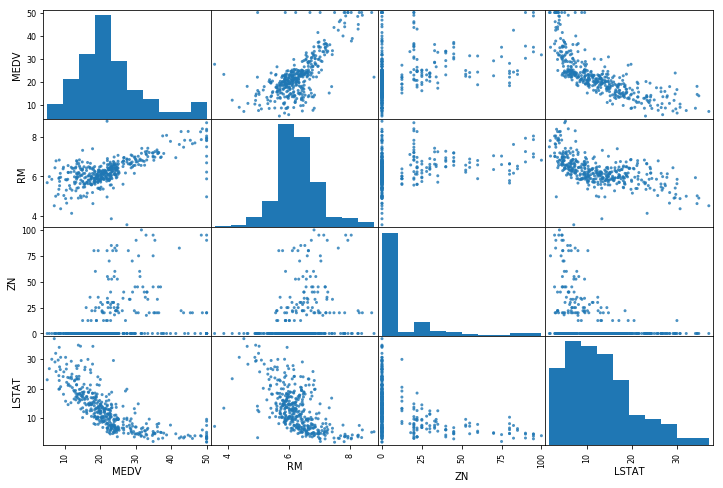

In [93]:
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize= (12, 8), alpha= 0.8 )
plt.show()

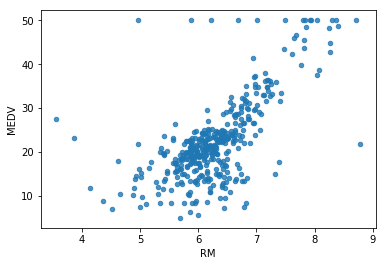

In [94]:
housing.plot(x='RM', y='MEDV', alpha=0.8, kind='scatter')
plt.show()

## Trying some new attribute combination

In [95]:
housing['TAXRM'] = housing['TAX'] / housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [96]:
new_corr_matrix = housing.corr()
new_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679283
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527850
LSTAT     -0.740494
Name: MEDV, dtype: float64

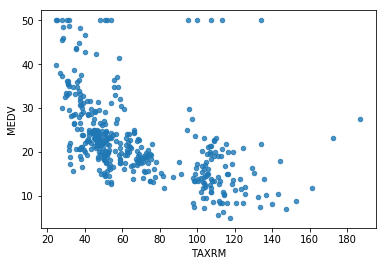

In [97]:
housing.plot(x='TAXRM', y='MEDV', kind='scatter', alpha=0.8)
plt.show()

In [98]:
housing_label = housing['MEDV'].copy()
housing = housing.drop(['MEDV','TAXRM'], axis=1)

In [99]:
# housing.head()
# housing.shape
# housing_label

## Handling the missing values

In [100]:
drop_rows = housing.dropna(subset=['RM']) # Remove all the rows in which 'RM' is NaN. Option 1
drop_rows.shape

(400, 13)

In [101]:
houseRM_median = housing['RM'].median()
# housing.fillna()
houseRM_median

6.2125

In [102]:
housing['RM'].fillna(houseRM_median).head()

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
Name: RM, dtype: float64

#### To Automate the filling of missing values use Sklearn.impute

In [103]:
# print('The scikit-learn version is {}.'.format(sklearn.__version__))
# print('The scikit-learn version is {}.'.format(np.__version__))
# print('The scikit-learn version is {}.'.format(pd.__version__))
# import scipy
# print('The scikit-learn version is {}.'.format(scipy.__version__))

In [104]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(housing)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [105]:
imputer.statistics_ # Calculate all the median for all columns

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21250e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [106]:
housing_trans = pd.DataFrame( imputer.transform(housing), columns=housing.columns )
housing_trans.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281332,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712016,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [107]:
type(housing_trans)

pandas.core.frame.DataFrame

In [108]:
housing_trans.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Creating a Machine Learning Pipeline

 We will transform our dataset missing values from median using Pipeline. We use this method to scale down our feature E.g. All the graph will have the same axis intervals (x,y) will be the same for every feature and the resultant of this will be a numpy_array

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

In [110]:
housing_scaled_trans = my_pipeline.fit_transform(housing)

In [111]:
# (housing['INDUS'][0] - housing['INDUS'].mean()) / housing['INDUS'].std()

In [112]:
housing_scaled_trans

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [113]:
housing_scaled_trans.shape

(404, 13)

## Selecting our Model

In [114]:
# Use this for in case. Here housing_trans is the dataFrame that we already applied Imputer on it but it is not passed through our pipeline
# some_data = housing_trans.iloc[:5]
# some_labels = housing_label.iloc[:5]



#### Instantiating our model and fitting our scaled_down housing data which is 'housing_scaled_trans' into our model

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_scaled_trans, housing_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [116]:
housing_scaled_trans[300]

array([-0.32145513, -0.4898311 , -0.46656149, -0.27288841, -0.17188021,
        0.55217183,  0.64698949,  0.23505856, -0.65766683, -0.62530717,
        1.18815263,  0.27969885, -0.11230576])

In [117]:
housing_label[254]

21.9

##### taking some data

In [118]:
housing.shape

(404, 13)

In [119]:
housing.iloc[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [120]:
list(housing_label[:5])

[21.9, 24.5, 16.7, 23.1, 23.0]

In [121]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]

prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.77, 25.1 , 16.64, 23.7 , 23.  ])

### Evaluating our model.

In [122]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_scaled_trans)
mse = mean_squared_error(housing_label, housing_predictions)
np.sqrt(mse)

1.5286478040774765

In [123]:
type(housing_predictions)

numpy.ndarray

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_scaled_trans, housing_label, scoring='neg_mean_squared_error', cv=10)
rmse_score = np.sqrt(-scores)
rmse_score

array([3.29221069, 2.7422187 , 4.12036317, 2.60660465, 3.81033463,
       2.82909835, 5.18238   , 3.56255772, 3.58839031, 3.95466465])

### Get the Mean and Standard Deviation of the output as an np_array 

In [125]:
def get_mean_std(score):
    print(f'Score : {score}')
    print(f'Mean : {score.mean()}')
    print('Standard Deviation : ', score.std())

In [126]:
get_mean_std(rmse_score)

Score : [3.29221069 2.7422187  4.12036317 2.60660465 3.81033463 2.82909835
 5.18238    3.56255772 3.58839031 3.95466465]
Mean : 3.568882288231147
Standard Deviation :  0.7313160909928984


## Saving Our Model using Joblib

In [127]:
from sklearn.externals import joblib
joblib.dump(model, 'dragon_real_estate.joblib')

['dragon_real_estate.joblib']

## Testing Our Model

In [128]:
X_test = strat_test_set.drop(['MEDV'], axis=1)
Y_test = strat_test_set['MEDV'].copy()

X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.180900723343108

In [129]:
final_predictions[:10]

array([24.86,  9.54, 25.35, 22.86, 18.84, 15.23, 20.87, 13.75, 31.16,
       43.14])

In [130]:
list(Y_test[:10])

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2]